In [11]:
# EDA Notebook: Karachi AQI Predictor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load data
df = pd.read_csv("../data/processed/final_features.csv", parse_dates=["datetime"])
df.head()

,datetime,hour,day,month,weekday,aqi_us,aqi_cn,main_pollutant,temp,humidity,...,pm10,nh3,computed_aqi,aqi_3avg,pm2_5_3avg,pm10_3avg,aqi_change_rate,computed_aqi_t+24,computed_aqi_t+48,computed_aqi_t+72
0,2025-07-15 13:17:00,13,15,7,1,66,24,p2,29,77,...,105.35,0,75.920707,65.666667,24.440000,111.393333,-0.014925,77.885657,75.405960,66.393991
1,2025-07-15 14:17:00,14,15,7,1,66,25,p2,28,78,...,105.42,0,75.955354,66.333333,23.773333,108.223333,0.000000,78.326162,74.257677,66.520172
2,2025-07-15 16:17:00,16,15,7,1,64,23,p2,28,79,...,106.05,0,76.267172,65.333333,23.240000,105.606667,-0.030303,78.974545,73.460808,67.087983
3,2025-07-15 17:17:00,17,15,7,1,75,31,p2,28,78,...,107.12,0,76.796768,68.333333,23.403333,106.196667,0.171875,79.984242,72.762929,67.445494
4,2025-07-15 18:17:00,18,15,7,1,75,32,p2,28,79,...,108.86,0,77.657980,71.333333,23.786667,107.343333,0.000000,80.934545,71.693838,67.571674


In [12]:
df.info()
df.describe()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 30 columns):
datetime             87 non-null datetime64[ns]
hour                 87 non-null int64
day                  87 non-null int64
month                87 non-null int64
weekday              87 non-null int64
aqi_us               87 non-null int64
aqi_cn               87 non-null int64
main_pollutant       87 non-null object
temp                 87 non-null int64
humidity             87 non-null int64
pressure             87 non-null int64
wind_speed           87 non-null float64
wind_direction       87 non-null int64
openweather_aqi      87 non-null int64
co                   87 non-null float64
no                   87 non-null float64
no2                  87 non-null float64
o3                   87 non-null float64
so2                  87 non-null float64
pm2_5                87 non-null float64
pm10                 87 non-null float64
nh3                  87 non-null int64
computed_aqi 

datetime             0
hour                 0
day                  0
month                0
weekday              0
aqi_us               0
aqi_cn               0
main_pollutant       0
temp                 0
humidity             0
pressure             0
wind_speed           0
wind_direction       0
openweather_aqi      0
co                   0
no                   0
no2                  0
o3                   0
so2                  0
pm2_5                0
pm10                 0
nh3                  0
computed_aqi         0
aqi_3avg             0
pm2_5_3avg           0
pm10_3avg            0
aqi_change_rate      0
computed_aqi_t+24    0
computed_aqi_t+48    0
computed_aqi_t+72    0
dtype: int64

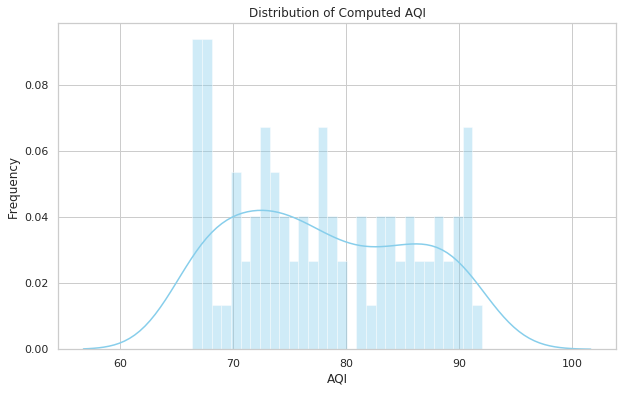

In [13]:
# Old seaborn versions: use distplot (deprecated in new versions)
sns.distplot(df["computed_aqi"], bins=30, color="skyblue", kde=True)
plt.title("Distribution of Computed AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

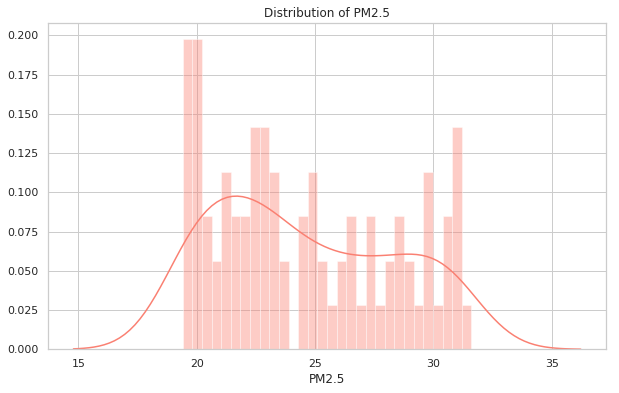

In [14]:
# Histogram: PM2.5
sns.distplot(df["pm2_5"], kde=True, bins=30, color="salmon")
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5")
plt.show()

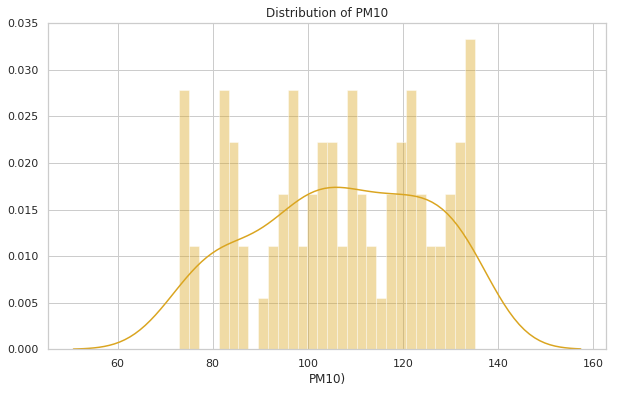

In [15]:
# Histogram: PM10
sns.distplot(df["pm10"], kde=True, bins=30, color="goldenrod")
plt.title("Distribution of PM10")
plt.xlabel("PM10)")
plt.show()

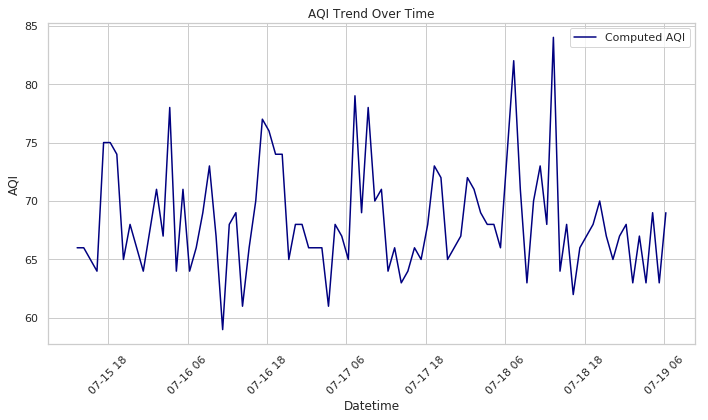

In [16]:
# AQI trend over time
plt.plot(df["datetime"], df["aqi_us"], label="Computed AQI", color="navy")
plt.title("AQI Trend Over Time")
plt.xlabel("Datetime")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

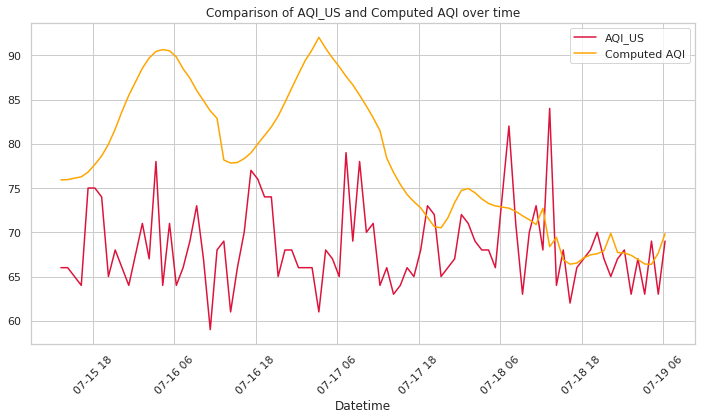

In [17]:
plt.plot(df["datetime"], df["aqi_us"], label="AQI_US", color="crimson")
plt.plot(df["datetime"], df["computed_aqi"], label="Computed AQI", color="orange")
plt.title("Comparison of AQI_US and Computed AQI over time")
plt.xlabel("Datetime")
# plt.ylabel("microgram per meter cube")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

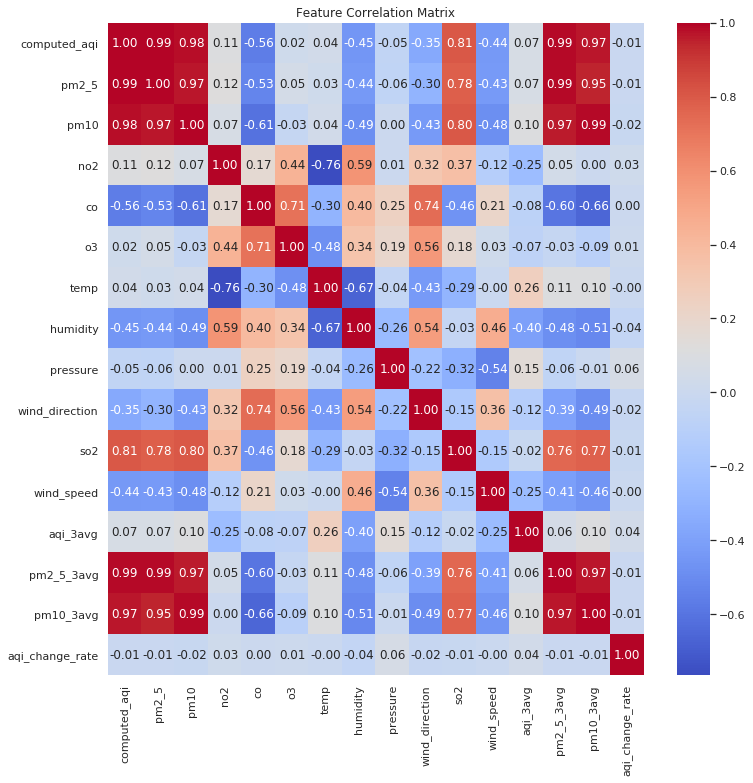

In [18]:
# Correlation heatmap
corr = df[["computed_aqi", "pm2_5", "pm10", "no2", "co", "o3", "temp", "humidity", "pressure", "wind_direction",
          "so2", "wind_speed", "aqi_3avg", "pm2_5_3avg", "pm10_3avg", "aqi_change_rate"]].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

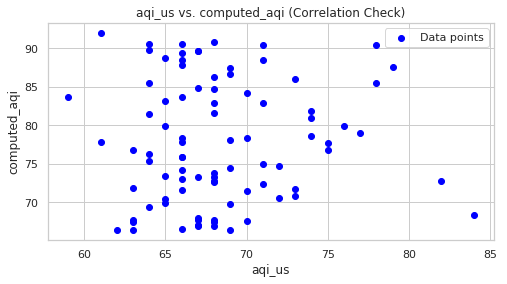

In [19]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(df["aqi_us"], df["computed_aqi"])

# Optional: Visualize the relationship
plt.figure(figsize=(8, 4))
plt.scatter(df["aqi_us"], df["computed_aqi"], color='blue', label='Data points')
plt.title("aqi_us vs. computed_aqi (Correlation Check)")
plt.xlabel("aqi_us")
plt.ylabel("computed_aqi")
plt.grid(True)
plt.legend()
plt.show()